In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
def cm_plot(cm, y_test, title):
    N = list(map(lambda clazz : sum(y_test == clazz), [*range(1,6)]))
    plt.figure(figsize=(7,5)) 
    c = plt.pcolormesh([cm[j, :] / N[j] for j in range(5)], vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(0.5 + np.arange(5), np.arange(1,6))
    plt.yticks(0.5 + np.arange(5), np.arange(1,6))
    c.update_scalarmappable()
    ax = c.axes
    for p, color, value in zip(c.get_paths(), c.get_facecolors(), c.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        ax.text(x, y, "%.2f" % value, ha="center", va="center", color=(0.0, 0.0, 0.0) if sum(color[:2] > 0.3) >= 2 else (1.0, 1.0, 1.0))
    plt.savefig(title+'.png', bbox_inches='tight', dpi=300)
    return plt.show()

In [3]:
df = pd.read_csv('../raw.nosync/reviewSample.csv', sep='\t')
X_train, X_test, y_train, y_test = train_test_split(df.text.values, df.stars, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=5000)
V_train = vectorizer.fit_transform(X_train).toarray()
words = vectorizer.get_feature_names()
V_test = vectorizer.transform(X_test).toarray()

(125000, 2)


['service', 'food', 'told', 'time', 'just', 'place', 'said', 'don', 'like', 'order', 'minutes', 'customer', 'worst', 'got', 'asked', 'didn', 'rude', 'horrible', 'did', 'bad']
['fairfax', 'decadent', 'bonne', 'heavenly', 'malaysian', 'complimented', 'butternut', 'nom', 'fruity', 'addicted', 'deliciously', 'scrumptious', 'wagyu', 'devoured', 'painless', 'aussi', 'slut', 'fame', 'contemporary', 'hearty']


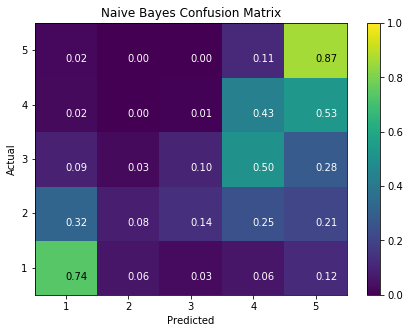

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['worst', 'horrible', 'terrible', 'awful', 'waste', 'rude', 'zero', 'disgusting', 'poor', 'avoid', 'tasteless', 'bland', 'told', 'worse', 'money', 'unprofessional', 'poisoning', 'disappointing', 'rip', 'left']
['great', 'delicious', 'amazing', 'friendly', 'good', 'love', 'awesome', 'excellent', 'nice', 'best', 'stars', 'definitely', 'fantastic', 'perfect', 'loved', 'helpful', 'tasty', 'fun', 'favorite', 'clean']


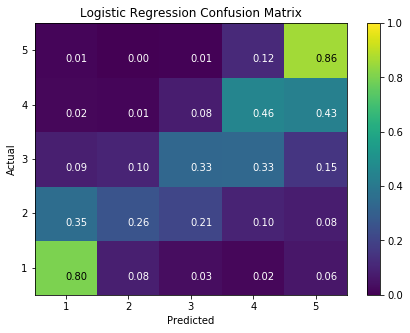

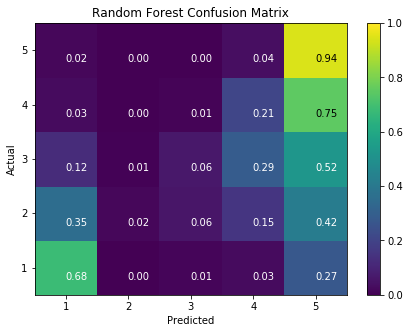

In [4]:
classifiers = {'Naive Bayes': MultinomialNB(), 'Logistic Regression': LogisticRegression(), 
               'Random Forest': RandomForestClassifier(n_estimators = 10, min_samples_leaf = 20, n_jobs = -1)}
for name, clf in classifiers.items():
    clf.fit(V_train, y_train)
    try:
        print([words[i] for i in np.argsort(clf.coef_[0])[::-1][:20]]) # bayes, logistic regression
        print([words[i] for i in np.argsort(clf.coef_[0])[::1][:20]])
        print([words[i] for i in np.argsort(clf.feature_importances_)[::-1][:20]]) # random forest, adaboost
    except:
        pass
    cm_plot(confusion_matrix(y_test, clf.predict(V_test)), y_test, name + ' Confusion Matrix')

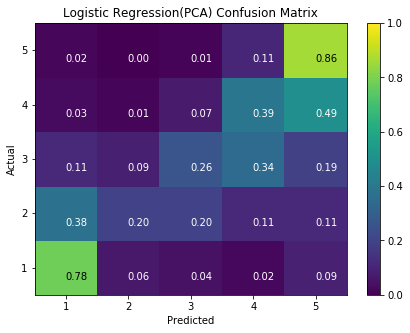

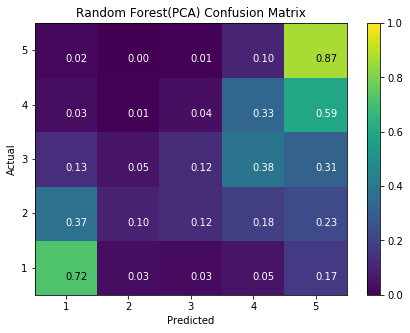

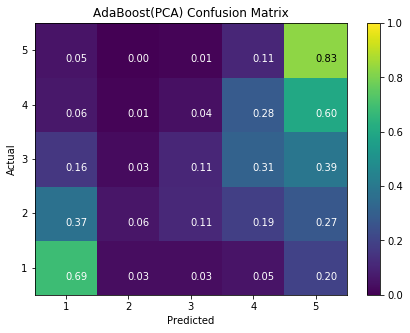

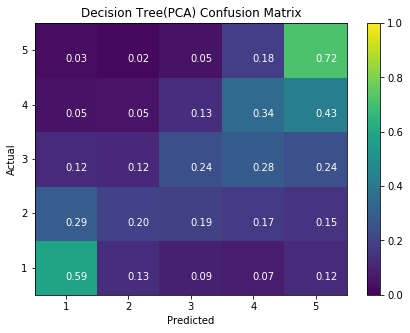

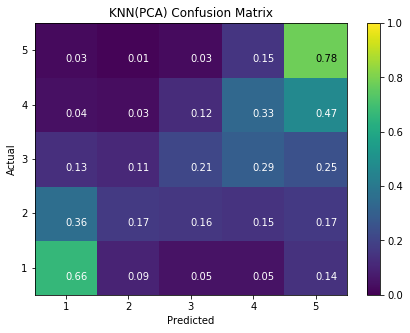

In [5]:
scaler = StandardScaler()
pca = PCA(n_components = 50)
V_train_pca = pca.fit_transform(scaler.fit_transform(V_train))
V_test_pca = pca.transform(scaler.transform(V_test))
del(V_train)
del(V_test)
classifiers_pca = {'Logistic Regression(PCA)': LogisticRegression(), 
                   'Random Forest(PCA)': RandomForestClassifier(n_estimators = 10, min_samples_leaf = 20, n_jobs = -1),
                   'AdaBoost(PCA)': AdaBoostClassifier(n_estimators = 10),
                   'Decision Tree(PCA)': DecisionTreeClassifier(max_depth = 15),
                   'KNN(PCA)': KNeighborsClassifier(p = 1, n_jobs = -1)}
for name, clf in classifiers_pca.items():
    clf.fit(V_train_pca, y_train)
    cm_plot(confusion_matrix(y_test, clf.predict(V_test_pca)), y_test, name + ' Confusion Matrix')